<a href="https://colab.research.google.com/github/varshitha102/story/blob/main/Maths_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Month     Bill
0  2020-01-01  1250.75
1  2020-02-01  2345.50
2  2020-03-01  1750.20
3  2020-04-01  1985.60
4  2020-05-01  2450.30
              Bill
count    83.000000
mean   2415.922892
std     668.907911
min    1230.450000
25%    1825.325000
50%    2450.100000
75%    2890.550000
max    3600.300000
Month    0
Bill     0
dtype: int64


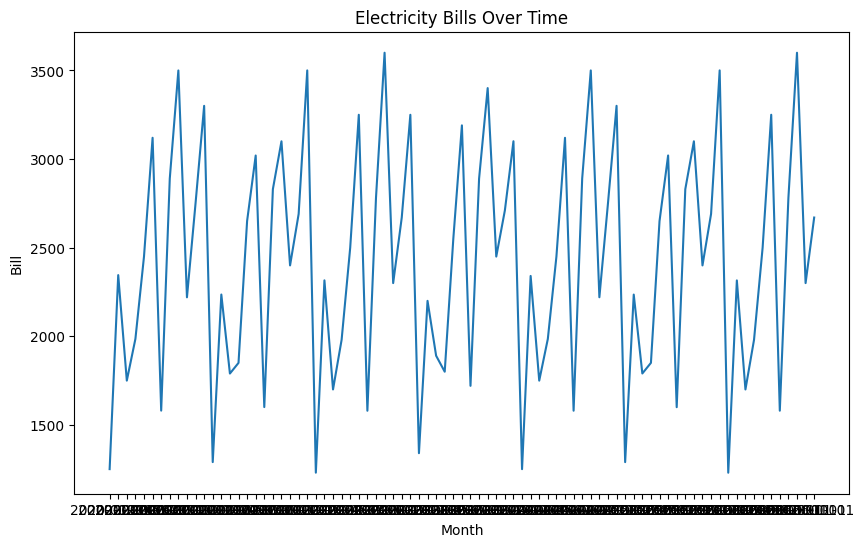

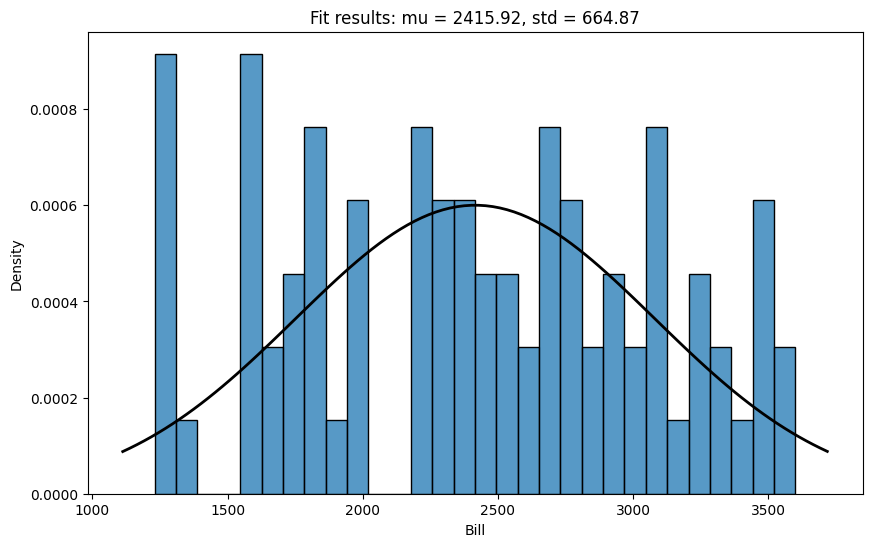

Predicted next month's bill: 1513.6638377130694
PDF value at next month's predicted bill: [0.00023893]


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Step 2: Load and Explore the Data
# Assuming the data is in a CSV file named 'electricity_bills.csv'
df = pd.read_csv('electricity_bills.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Get a summary of the data
print(df.describe())

# Step 3: Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop them (if any)
df = df.fillna(method='ffill')

# Visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Bill')
plt.title('Electricity Bills Over Time')
plt.xlabel('Month')
plt.ylabel('Bill')
plt.show()

# Step 4: Choose a Probability Distribution
# Fit a normal distribution to the data
mu, std = norm.fit(df['Bill'])

# Plot the histogram and the probability density function
plt.figure(figsize=(10, 6))
sns.histplot(df['Bill'], kde=False, stat="density", bins=30)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Fit results: mu = {:.2f}, std = {:.2f}'.format(mu, std))
plt.xlabel('Bill')
plt.ylabel('Density')
plt.show()

# Step 5: Predict the Next Month's Bill
# Predict the next month's bill
next_month_bill = norm.rvs(loc=mu, scale=std, size=1)
print('Predicted next month\'s bill:', next_month_bill[0])

# Calculate the probability density function (PDF) value at the next month's predicted bill
pdf_next_month_bill = norm.pdf(next_month_bill, mu, std)
print('PDF value at next month\'s predicted bill:', pdf_next_month_bill)